Assignment 10 Part 1:

Urls of website I read and videos I watched:
Watched 2 of the videos
Downloaded and read Chapter 14

Read: 
https://ipython-books.github.io/71-exploring-a-dataset-with-pandas-and-matplotlib/ 

https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/notebook


Part 2: Data set 1 

#### Import all library neccessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Download the Transit performance database

In [2]:
URL = "https://data.winnipeg.ca/api/views/gp3k-am4u/rows.csv?accessType=DOWNLOAD"
from urllib.request import urlretrieve
urlretrieve(URL,"performance.csv")

KeyboardInterrupt: 

#### Get the first five item from data

In [3]:
data = pd.read_csv("performance.csv")
data.head()

,Row ID,Stop Number,Route Number,Route Name,Route Destination,Day Type,Scheduled Time,Deviation,Location
0,1119756992,20039,19,Marion-Logan-Notre Dame,Red River College via Logan,Saturday,03/04/2023 05:21:18 AM,101.0,POINT (-97.210897850672 49.916541865666)
1,1117751573,30596,34,McPhillips Super Express,Downtown,Weekday,03/01/2023 06:23:00 AM,-20.0,POINT (-97.173991568832 49.946153483186)
2,1119756993,20320,19,Marion-Logan-Notre Dame,Red River College via Logan,Saturday,03/04/2023 05:22:00 AM,96.0,POINT (-97.212227346548 49.917506841495)
3,1119756995,20320,19,Marion-Logan-Notre Dame,Windsor Park via Autumnwood,Saturday,03/04/2023 05:25:00 AM,-106.0,POINT (-97.212227346548 49.917506841495)
4,1119756997,20038,19,Marion-Logan-Notre Dame,Windsor Park via Autumnwood,Saturday,03/04/2023 05:25:22 AM,-107.0,POINT (-97.211474993678 49.916379866785)


<Axes: >

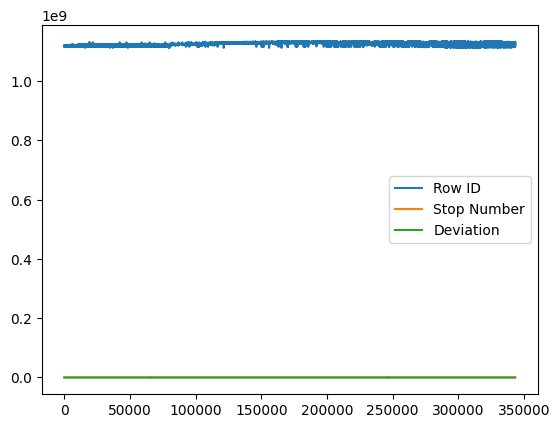

In [4]:
data.plot()

I am not able to get anything useful out of this graph

#### Get the data shape

In [5]:
print(data.shape)

(343278, 9)


#### Get all the column of data

In [6]:
print(data.columns)

Index(['Row ID', 'Stop Number', 'Route Number', 'Route Name',
       'Route Destination', 'Day Type', 'Scheduled Time', 'Deviation',
       'Location'],
      dtype='object')


#### Get the description of data 

In [7]:
data.describe()

,Row ID,Stop Number,Deviation
count,3.432780e+05,343278.000000,343277.000000
mean,1.125646e+09,34925.985927,-56.147336
std,6.364746e+06,19105.549729,211.463466
min,1.111549e+09,10001.000000,-5218.000000
25%,1.120573e+09,11022.000000,-121.000000
50%,1.125086e+09,30894.000000,-29.000000
75%,1.131646e+09,50670.000000,40.000000
max,1.133100e+09,62041.000000,7467.000000


I can't find something useful here

#### Create a dataframe which contains Day Type type and its count

In [8]:
daytype_count = data["Day Type"].value_counts()
daytype_count_df = pd.DataFrame({'Day Type': daytype_count.index, 'Count': daytype_count.values}, index=daytype_count.index)

print(daytype_count_df)

          Day Type   Count
Weekday    Weekday  310054
Saturday  Saturday   21348
Sunday      Sunday   11875


#### Create a pie chart of the proportion between the ammount of each of the Day Type that bus runs on

<Axes: ylabel='Count'>

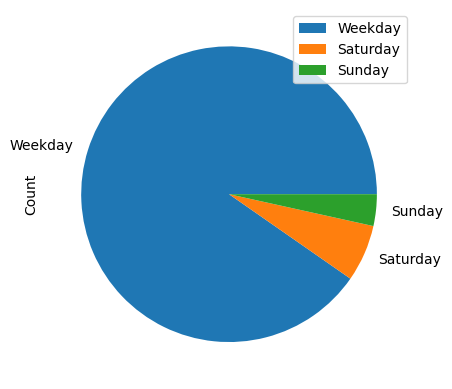

In [9]:
daytype_count_df.plot.pie(y='Count')

From this chart, we can see that over 75% of the bus are running in the weekdays. In the weekends and holidays, there are less bus and they are probably stop at less busstop.

#### Create a dataframe of Route Number and its count

In [10]:
routeNumber_count = data["Route Number"].value_counts()
routeNumber_count_df = pd.DataFrame({'Route Number': routeNumber_count.index, 'Count': routeNumber_count.values}, index=routeNumber_count.index)

#### Print out the dataframe

In [11]:
routeNumber_count_df

,Route Number,Count
16,16,21300
21,21,19308
19,19,15921
47,47,14336
11,11,13613
...,...,...
57,57,681
56,56,679
53,53,656
30,30,467


#### Create a bar chart for the datafram of top 20 transit route that have the most stop and its amount of stop 

<Axes: xlabel='Route Number'>

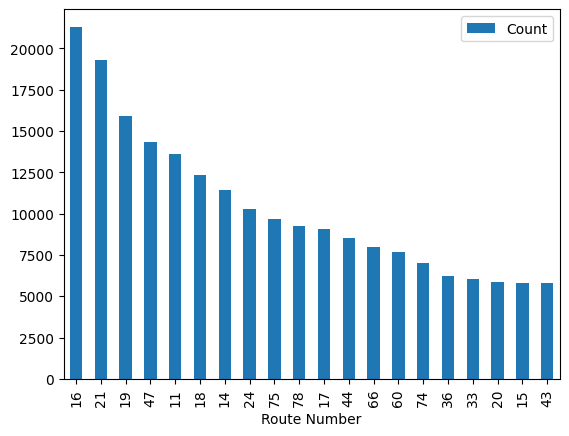

In [12]:
routeNumber_count_df.head(20).plot.bar(x = "Route Number", y = "Count")

From this chart, we can see that 11 is the bus route with the most stop

In [13]:
data['Scheduled Time'] = pd.to_datetime(data['Scheduled Time'])  # convert the 'Time' column to a datetime data type
data['Hour'] = data['Scheduled Time'].dt.hour  # create a new 'Hour' column with the hour of the day
hour_counts = data['Hour'].value_counts().sort_index()
hour_stops = pd.DataFrame({'Hour': hour_counts.index, 'Stop Count': hour_counts.values})

print(hour_stops)

    Hour  Stop Count
0    5.0       10503
1    6.0       47267
2    7.0       54051
3    8.0       41820
4    9.0       25585
5   10.0       19722
6   11.0       19009
7   12.0       19434
8   13.0       19011
9   14.0       19294
10  15.0       21093
11  16.0       20655
12  17.0       17320
13  18.0        7700
14  19.0         812
15  23.0           1


I did not expect that there is no stop on some hours, that's why I did not check and add missing hours to the dataframe

#### Reindex hour_counts with value from 0 to 23 to make sure that missing hours are included and set the stop count to zero

In [14]:
all_hours = pd.Series(range(24))
hour_counts = hour_counts.reindex(all_hours, fill_value=0) #Fill missing value with 0

hour_stops = pd.DataFrame({'Hour': hour_counts.index, 'Stop Count': hour_counts.values})
print(hour_stops)

    Hour  Stop Count
0      0           0
1      1           0
2      2           0
3      3           0
4      4           0
5      5       10503
6      6       47267
7      7       54051
8      8       41820
9      9       25585
10    10       19722
11    11       19009
12    12       19434
13    13       19011
14    14       19294
15    15       21093
16    16       20655
17    17       17320
18    18        7700
19    19         812
20    20           0
21    21           0
22    22           0
23    23           1


#### Draw a graph for the datafram of top 20 transit route that have the most stop and its amount of stop 

<Axes: xlabel='Hour'>

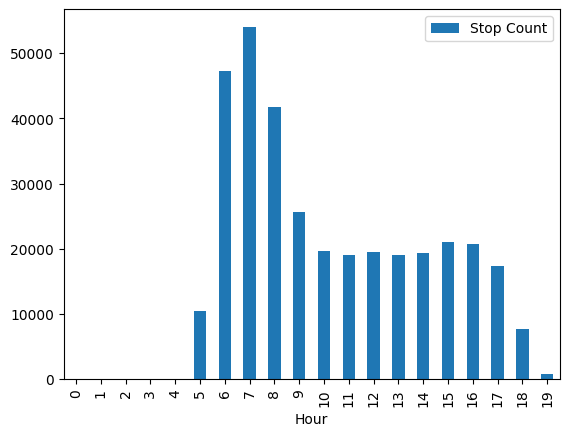

In [15]:
hour_stops.head(20).plot.bar(x = "Hour", y = "Stop Count")

From this chart, we can see that there are no bus stop from 12am to 4 pm. The hour that has the most bus stop is 7am and the hour that has the least bus stop is at 7pm. Also, there are to spikes in the amount of bus stop: one is at 7am and one is at 4pm. Those are the hours that bus stop the most and my prediction is that it happens due to the amount of people go to work, school and go home from work, school.

#### Create a dataframe of Location and its count

In [16]:
location_count = data["Location"].value_counts()
location_count_df = pd.DataFrame({'Location': location_count.index, 'Count': location_count.values})


#### Draw a graph for the dataframe of 10 bus stop location that has the most stop 

<Axes: xlabel='Location'>

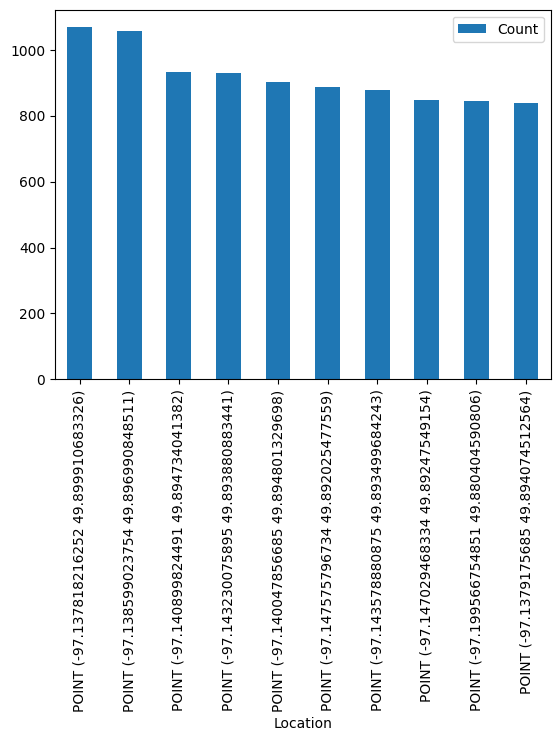

In [17]:
location_count_df.head(10).plot.bar(x = "Location", y = "Count")

This graph demonstrate 10 bus stops location that has the most stop in the city of Winnipeg

#### Create a dataframe of Route Destination and its count

In [18]:
destination_count = data["Route Destination"].value_counts()
destination_count_df = pd.DataFrame({'Route Destination': destination_count.index, 'Count': destination_count.values})

#### Draw a graph for the dataframe of 10 Route Destination that have the most bus visit

<Axes: xlabel='Route Destination'>

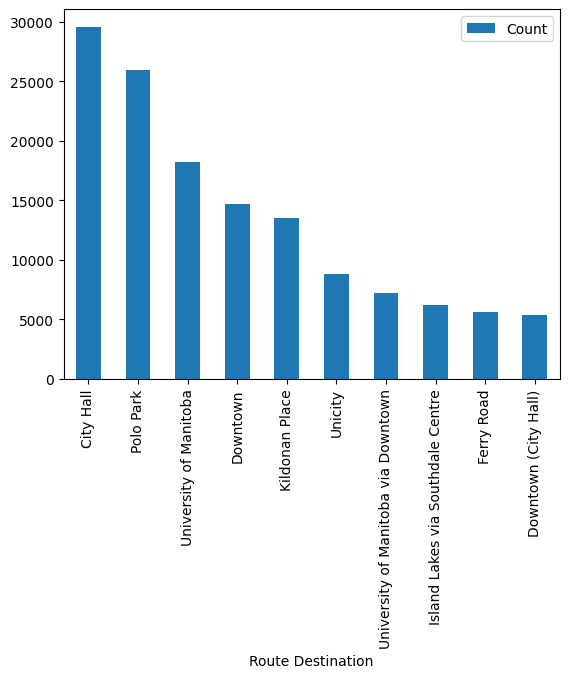

In [19]:
destination_count_df.head(10).plot.bar(x = "Route Destination", y = "Count")

This graph shows that the destination that most of the buses visit is Polo Park.

#### Draw a graph for the dataframe of 10 Route Destination that have the least bus visit

<Axes: xlabel='Route Destination'>

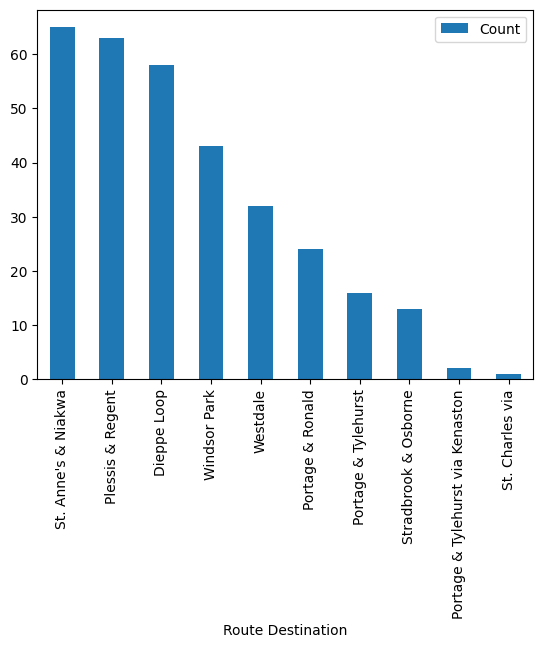

In [20]:
destination_count_df.tail(10).plot.bar(x = "Route Destination", y = "Count")

This graph shows that Portage $ Rouge is the destination that bus visit the least

Second data set:

In [21]:
URL = "https://data.winnipeg.ca/api/views/6x82-bz5y/rows.csv?accessType=DOWNLOAD"
urlretrieve(URL,"substance_use.csv")

('substance_use.csv', <http.client.HTTPMessage at 0x1d21f9ff280>)

#### Get the first five item from the database

In [22]:
data2 = pd.read_csv("substance_use.csv", index_col="Incident Number", parse_dates =True)
data2.head()

,Dispatch Date,Patient Number,Age,Gender,Substance,Ward,Neighbourhood ID,Neighbourhood
Incident Number,,,,,,,,
2022528702,06/08/2022 04:11:23 AM,1,35 to 39,Female,Crystal Meth,Mynarski,NE151,Robertson
2022528734,06/08/2022 06:57:13 AM,1,55 to 59,Male,Alcohol,St. Boniface,NE027,Central St. Boniface
2022528737,06/08/2022 07:00:32 AM,1,20 to 24,Male,Alcohol,St. Vital,NE158,Royalwood
2022528750,06/08/2022 08:11:24 AM,1,30 to 34,Male,Opioids,NaN,NaN,NaN
2021157921,12/26/2021 12:12:24 AM,1,15 to 19,Male,Marijuana,Transcona,NE060,Grassie


#### Get the data shape

In [23]:
print(data2.shape)

(80233, 8)


#### Get the data columns

In [24]:
print(data2.columns)

Index(['Dispatch Date', 'Patient Number', 'Age', 'Gender', 'Substance', 'Ward',
       'Neighbourhood ID', 'Neighbourhood'],
      dtype='object')


#### Create a dataframe which contains age and its count

In [25]:
age_counts = data2['Age'].value_counts()
age_counts_df = pd.DataFrame({'Age': age_counts.index, 'Count': age_counts.values}).sort_values(by="Age")

#### Create a graph for the dataframe of age and its report amount

<Axes: xlabel='Age'>

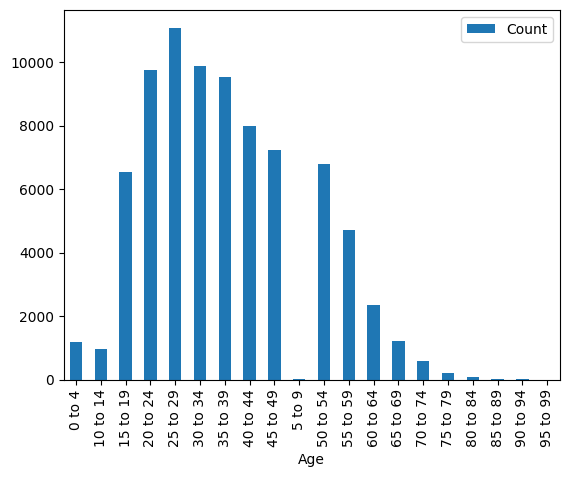

In [26]:
age_counts_df.head(20).plot.bar(x = "Age", y = "Count")

From the graph, there are a few interesting facts. Firstly, the age that use the most substance is from 25 to 29. Secondly, the number of  substance use record of children from 0 to 4 years old is higher than children from 5 to 9.

#### Create a dataframe which contains gender and its count

In [27]:
gender_counts = data2['Gender'].value_counts()
gender_counts_df = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})

#### Create a graph for the dataframe of gender and its report amount

<Axes: ylabel='Count'>

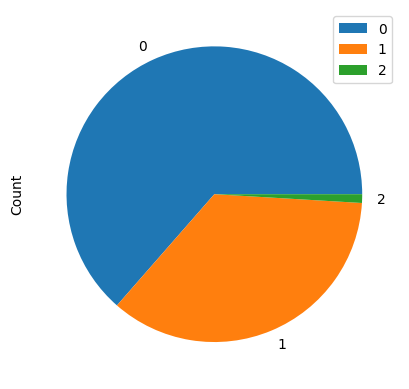

In [28]:
gender_counts_df.plot.pie(y='Count')

The pie chart above shows that the number of male who uses substance is significantly higher than female and unknown gender.

#### Create a dataframe which contains substance and its count

In [29]:
Substance_counts = data2['Substance'].value_counts()
Substance_counts_df = pd.DataFrame({'Substance': Substance_counts.index, 'Count': Substance_counts.values})

print(Substance_counts_df)

      Substance  Count
0       Alcohol  59055
1  Crystal Meth   9584
2       Opioids   6761
3     Marijuana   2526
4       Cocaine   2306


#### Create a graph for the dataframe of substance and its report amount

<Axes: xlabel='Substance'>

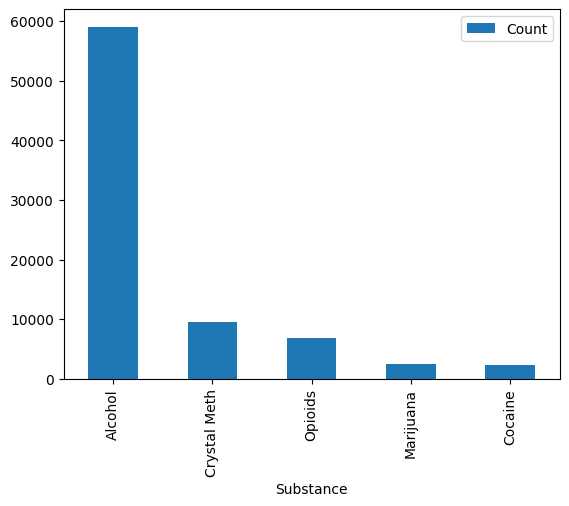

In [30]:
Substance_counts_df.plot.bar(x = "Substance", y = "Count")

The graph above shows that Alcohol has the highest amount of use, more than five time higher than Crytal Meth, which comes at second